In [16]:
%load_ext autoreload
%autoreload 2
import seml
import seaborn as sns
from poisson_atac.utils import model_type_map
import itertools
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from poisson_atac.utils import load_experiment

In [18]:
save_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/'
fig_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/Figure2/scib'

In [19]:
dataset_map = {'neurips': 'Neurips\nall batches', 'hematopoiesis': 'Satpathy\net al.'}

In [20]:
def load_seml(seml_database):
    results = seml.get_results(seml_database, to_data_frame=True,  fields=["config", "config_hash", "result", "batch_id"])

    results['config.data.dataset'] = results['config.data.dataset'].map(dataset_map)
    results['config.setup.model_params.use_observed_lib_size'] = results['config.setup.model_params.use_observed_lib_size'].map({True: "True", False: "False", np.nan: ''})
    results['config.model.model_type'] = results['config.model.model_type'] + results['config.setup.model_params.use_observed_lib_size'].astype(str) 
    results["config.model.model_type"] = results["config.model.model_type"].map(model_type_map)

    return results

In [21]:
model_order = [model_type_map['poissonviTrue'], model_type_map['poissonviFalse'], model_type_map['binaryviTrue'], model_type_map["peakvi"]]

In [22]:
seml_database = 'atac_to_atac'

In [23]:
results = load_seml(seml_database)

  0%|          | 0/150 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

In [24]:
results

,_id,batch_id,config_hash,config.overwrite,config.db_collection,config.data.batch,config.data.dataset,config.model.model_type,config.optimization.regularization.learning_rate,config.optimization.regularization.weight_decay,...,config.seed,result.test_cells,result.test_cells_counts,result.embedding,result.average_precision,result.rmse,result.bce,result.nmi,result.ari,result.model_path
0,1,1,df10f465df1fffce49cdfab6b76f076f,1,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12340...,0 NMI_cluste...,0.235165,0.155896,11091.780654,0.756231,0.706264,/storage/groups/ml01/workspace/laura.martens/a...
1,2,1,88e513708fc67d6d1551475a95af51de,2,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (obs. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12019...,0 NMI_cluste...,0.269281,0.154149,10813.440339,0.746448,0.671021,/storage/groups/ml01/workspace/laura.martens/a...
2,3,1,c6c356eb75c850b4486d7a3212518fa3,3,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12328...,0 NMI_cluste...,0.236160,0.155780,11074.442928,0.747380,0.696933,/storage/groups/ml01/workspace/laura.martens/a...
3,4,1,5c4f7a50d51ff2949ca583b19418c2a7,4,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (obs. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12017....,0 NMI_cluste...,0.269407,0.154142,10811.580137,0.759786,0.707106,/storage/groups/ml01/workspace/laura.martens/a...
4,5,1,ebc285922517901abe53b10038c74030,5,atac_to_atac,"[s1d1, s1d2, s1d3, s2d1, s2d5, s3d10, s3d3, s3...",Neurips\nall batches,Poisson VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,Model poisson_loss 12331...,0 NMI_cluste...,0.236045,0.155813,11080.731466,0.756329,0.706352,/storage/groups/ml01/workspace/laura.martens/a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,155,7,e175c749dcae62f4105b3909a6326574,155,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.243685,0.182825,17368.802755,0.818149,0.719700,/storage/groups/ml01/workspace/laura.martens/a...
146,156,7,8c8f7d7898ff312cf3dce968208ca6c1,156,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.247330,0.185191,17755.881027,0.815225,0.704560,/storage/groups/ml01/workspace/laura.martens/a...
147,157,7,103b404808a9d5ae44c55e3ac8326c1b,157,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.245337,0.184666,17662.904195,0.811129,0.708289,/storage/groups/ml01/workspace/laura.martens/a...
148,158,7,0c5a89fd6bad7e06e614b12c24e32609,158,atac_to_atac,None,Satpathy\net al.,Binary VAE (enc. ls),0.0001,0.001,...,906691060,Model auroc ...,None,0 NMI_cluste...,0.243028,0.183037,17406.027552,0.809350,0.696343,/storage/groups/ml01/workspace/laura.martens/a...


In [25]:
df = results[results["config.data.batch"].isna()] #filtering for test data
df = df[df['config.model.model_type'].isin(model_order)]
# filtering for double runs
df1 = df.loc[df['config.data.dataset'] == dataset_map['neurips']]
df2 = df.loc[df['config.data.dataset'] == dataset_map['hematopoiesis']]
df2.drop(df2.index[(df2['batch_id'] < 7) & (df2['config.model.model_type'] != model_type_map['poissonviTrue'])], inplace =True)
df = pd.concat([df1, df2])

/tmp/ipykernel_28139/3062560243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(df2.index[(df2['batch_id'] < 7) & (df2['config.model.model_type'] != model_type_map['poissonviTrue'])], inplace =True)


In [26]:
df.shape

(40, 29)

In [27]:
# Export data for scib plotting in R

scib_table = pd.concat(df['result.embedding'].values, axis =1).T

scib_table.shape

scib_table.index = "/" + df['config.data.dataset'] + "/metrics/unscaled/full_feature/" + df['config.model.model_type'] + "_embed"

scib_table.index.name = "X"

scib_table = scib_table.reset_index().groupby('X').agg("mean")

scib_table

,NMI_cluster/label,ARI_cluster/label,ASW_label,ASW_label/batch,PCR_batch,cell_cycle_conservation,isolated_label_F1,isolated_label_silhouette,graph_conn,kBET,iLISI,cLISI,hvg_overlap,trajectory
X,,,,,,,,,,,,,,
/Neurips\nall batches/metrics/unscaled/full_feature/Binary VAE (obs. ls)_embed,0.747178,0.659669,0.556992,0.884315,0.249482,NaN,0.067199,0.511406,0.958561,NaN,0.243119,0.983426,NaN,0.888515
/Neurips\nall batches/metrics/unscaled/full_feature/PeakVI_embed,0.750811,0.667789,0.546427,0.895350,0.026826,NaN,0.069539,0.483887,0.962339,NaN,0.236109,0.983271,NaN,0.884897
/Neurips\nall batches/metrics/unscaled/full_feature/Poisson VAE (enc. ls)_embed,0.745416,0.656426,0.557718,0.892049,0.470136,NaN,0.064939,0.519066,0.957875,NaN,0.274025,0.983528,NaN,0.885737
/Neurips\nall batches/metrics/unscaled/full_feature/Poisson VAE (obs. ls)_embed,0.748451,0.663437,0.565146,0.880303,0.315351,NaN,0.070698,0.514878,0.957265,NaN,0.249144,0.984670,NaN,0.887515
/Satpathy\net al./metrics/unscaled/full_feature/Binary VAE (obs. ls)_embed,0.820078,0.711561,0.564919,0.882550,0.224225,NaN,0.920436,0.556249,0.990474,NaN,0.035456,0.996214,NaN,NaN
/Satpathy\net al./metrics/unscaled/full_feature/PeakVI_embed,0.822923,0.713127,0.576197,0.874271,0.000000,NaN,0.929212,0.515166,0.991217,NaN,0.031825,0.997181,NaN,NaN
/Satpathy\net al./metrics/unscaled/full_feature/Poisson VAE (enc. ls)_embed,0.819503,0.718613,0.554623,0.887748,0.318981,NaN,0.922404,0.551440,0.989218,NaN,0.040489,0.994964,NaN,NaN
/Satpathy\net al./metrics/unscaled/full_feature/Poisson VAE (obs. ls)_embed,0.823789,0.717737,0.565167,0.885292,0.226731,NaN,0.921416,0.554037,0.990295,NaN,0.035529,0.996317,NaN,NaN


In [28]:
scib_table.to_csv(os.path.join(save_path, "integration_metrics_mean.csv"))

In [71]:
source("plotSingleTaskATAC.R") 
plotSingleTaskATAC('/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/processed/scib/integration_metrics_mean.csv',
                  outdir='/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/panels/Figure2/scib')

NameError: name 'source' is not defined

In [13]:
# Plot distirbution

scib_table = pd.concat(df['result.embedding'].values, axis =1).T.dropna(axis=1, how='all')

In [14]:
batch_metrics = ['PCR_batch', 'ASW_label/batch', 'graph_conn']
bio_metrics = ['NMI_cluster/label', 'ARI_cluster/label', 'ASW_label', 'isolated_label_F1', 'isolated_label_silhouette', 'trajectory']

scib_table = scib_table.loc[:, batch_metrics+bio_metrics]

scib_table["Model"] = df['config.model.model_type'].values
scib_table["Dataset"] = df['config.data.dataset'].values

weight_batch=0.4
score_group_batch = scib_table.loc[:, batch_metrics].mean(axis=1)
score_group_bio = scib_table.loc[:, bio_metrics].mean(axis=1)
score_all = (weight_batch*score_group_batch + (1-weight_batch)*score_group_bio)

scib_table.insert(0, "Overall", score_all)

metrics_map = dict(zip(
  ["ASW_label", "ASW label/batch", "cell cycle conservation", "hvg overlap", "trajectory", "graph conn", "iLISI", "cLISI"], 
  ["Cell type ASW", "Batch ASW", "CC conservation", "HVG conservation", "trajectory conservation", "graph connectivity", "graph iLISI", "graph cLISI"]
))

scib_table.columns = scib_table.columns.str.replace("_", " ")

scib_table.columns = pd.Series(scib_table.columns).replace(metrics_map)

In [15]:
scib_table

,Overall,PCR batch,Batch ASW,graph connectivity,NMI cluster/label,ARI cluster/label,ASW label,isolated label F1,isolated label silhouette,trajectory conservation,Model,Dataset
0,0.635822,0.334432,0.882113,0.959461,0.746727,0.663724,0.563900,0.068802,0.520541,0.893189,Poisson VAE (obs. ls),Neurips\nall batches
0,0.634910,0.335268,0.881053,0.958334,0.749655,0.665630,0.565263,0.072776,0.511352,0.884883,Poisson VAE (obs. ls),Neurips\nall batches
0,0.632454,0.308981,0.877613,0.955953,0.756610,0.676647,0.565550,0.069357,0.513817,0.885835,Poisson VAE (obs. ls),Neurips\nall batches
0,0.634594,0.322508,0.880602,0.958820,0.750911,0.673619,0.565169,0.066502,0.516974,0.890187,Poisson VAE (obs. ls),Neurips\nall batches
0,0.622561,0.275570,0.880133,0.953755,0.738353,0.637562,0.565851,0.076051,0.511707,0.883479,Poisson VAE (obs. ls),Neurips\nall batches
0,0.645646,0.421956,0.892215,0.958549,0.745034,0.656447,0.557936,0.063818,0.513581,0.889348,Poisson VAE (enc. ls),Neurips\nall batches
0,0.657213,0.485147,0.890318,0.961058,0.747617,0.667653,0.558143,0.069428,0.523670,0.890253,Poisson VAE (enc. ls),Neurips\nall batches
0,0.650173,0.486477,0.894483,0.956367,0.742659,0.625412,0.555211,0.064516,0.515522,0.881974,Poisson VAE (enc. ls),Neurips\nall batches
0,0.648344,0.448815,0.886954,0.956945,0.743553,0.651215,0.560986,0.064359,0.524921,0.881451,Poisson VAE (enc. ls),Neurips\nall batches
0,0.659982,0.508287,0.896274,0.956455,0.748216,0.681403,0.556315,0.062572,0.517634,0.885656,Poisson VAE (enc. ls),Neurips\nall batches


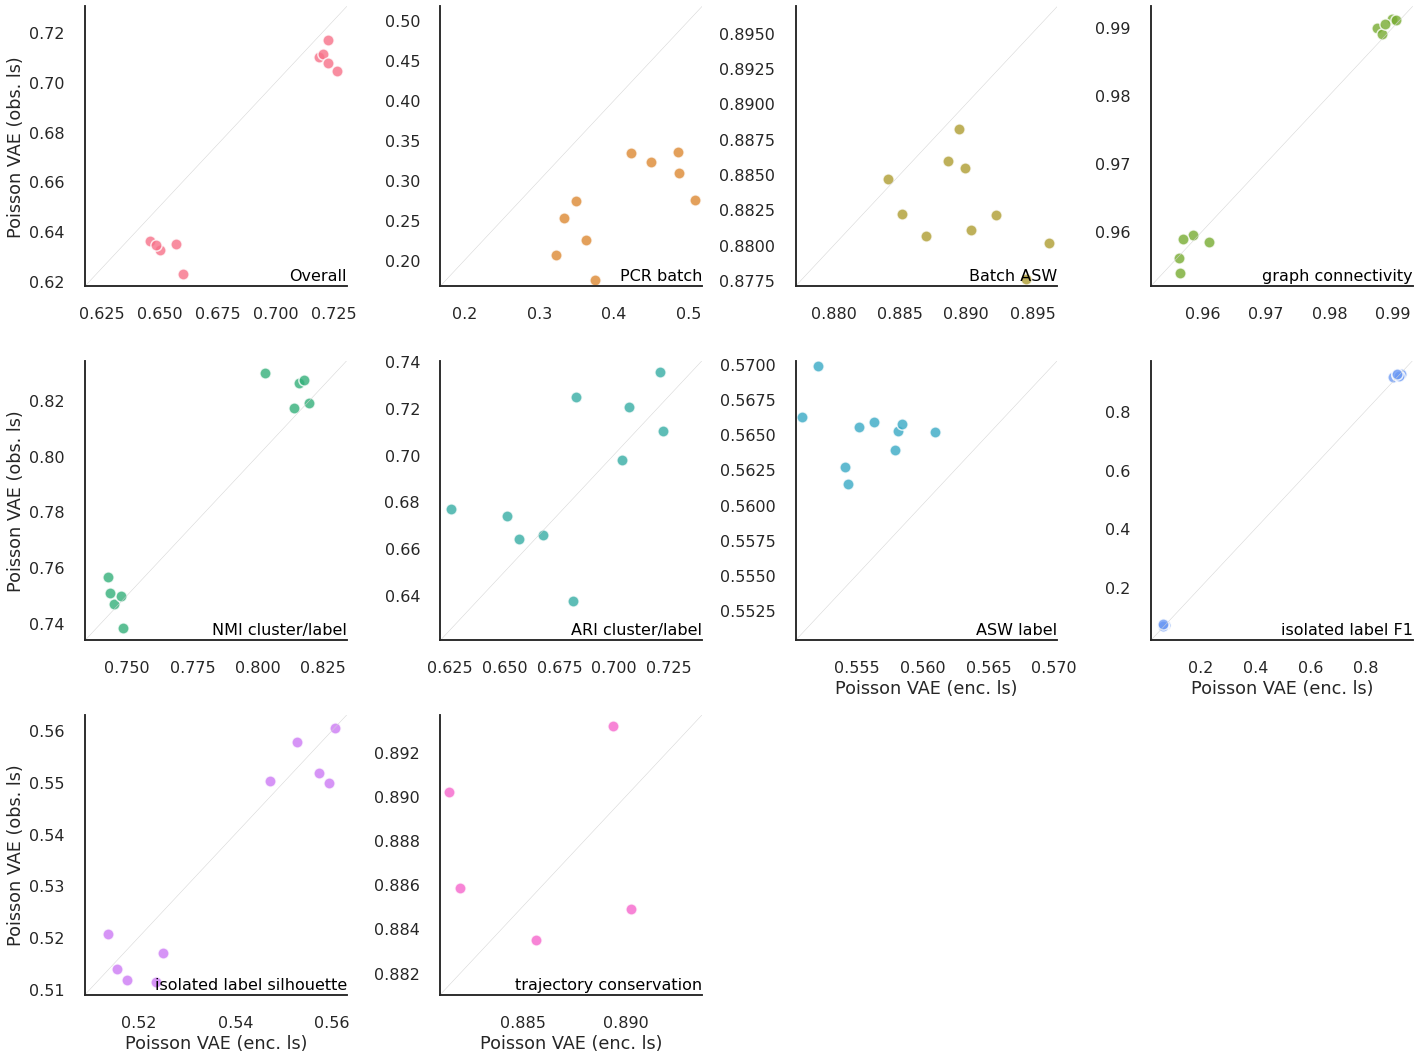

In [20]:
# Plot scatterplot

sns_df = scib_table.drop("Dataset", axis=1).melt(id_vars=["Model"])

df1 = sns_df[sns_df["Model"] == model_type_map["poissonviTrue"]]
df2 = sns_df[sns_df["Model"] == model_type_map["poissonviFalse"]]

merged_df = pd.DataFrame({model_type_map["poissonviTrue"]: df1.value.values, model_type_map["poissonviFalse"]: df2.value.values, 'Metric': df1.variable.values})

sns.set_style("white")
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(merged_df, col="Metric", hue="Metric", aspect=1, height=5, sharex=False, sharey=False, col_wrap=4)
g.map(sns.scatterplot, model_type_map["poissonviFalse"],model_type_map["poissonviTrue"],alpha=0.8, linewidth=1.5)


for label, ax in g.axes_dict.items():
    ax.text(1, 0.01, label, fontweight="normal", color="black",
            ha="right", va="bottom", transform=ax.transAxes)
    x_lim=ax.get_xlim()
    y_lim=ax.get_ylim()
    lim = (min(x_lim[0],y_lim[0]), max(x_lim[1],y_lim[1]))
    ax.axline((0.5,0.5), slope=1, color="lightgrey", linewidth=.5)
    ax.set_xlim(lim)
    ax.set_ylim(lim)

g.set_titles("")
plt.tight_layout()
#plt.savefig(os.path.join(fig_path, "integration_metrics_dist.pdf"))
#plt.savefig(os.path.join(fig_path, "integration_metrics_dist.png"))

In [18]:
df2.shape

(90, 3)

In [6]:
# Plot boxplot
dataset = "neurips"
sns_df = scib_table[scib_table["Dataset"] == "neurips"]

sns_df = sns_df.melt(id_vars=["Dataset", "Model"], var_name = "Metric", value_name="Value")

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=sns_df, x="Value", y = "Metric", hue="Model", ax=ax)

merged_df

test = scib_table.melt(id_vars = ['Dataset', "Model"])

import matplotlib.patches as  mpatches
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(test.dropna(), row="variable", hue="Model", aspect=10, height=1.5, sharex=False, sharey=False)
g.map(sns.kdeplot, "value",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=0.5, linewidth=1.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

for label, ax in g.axes_dict.items():
    ax.text(0, .2, label, fontweight="normal", color="black",
            ha="left", va="center", transform=ax.transAxes)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=False, left=True)
handles = [mpatches.Patch(facecolor=plt.cm.Reds(100)),
           mpatches.Patch(facecolor=plt.cm.Blues(100))]
g.axes_dict["Overall"].legend(bbox_to_anchor=(1, 3.5), loc = 'best')

NameError: name 'load_seml' is not defined